In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plotly.offline.init_notebook_mode (connected = True)

import ipywidgets as widgets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## this notebook was aided with the help of https://www.kaggle.com/code/adityamhaske/credit-card-fraud-eda-and-feature-importance

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Building Classifiers for Credit Card Fraud Detection

## This notebook and project aims to find the best method of fraudulent credit card activity. It is important as a consumer that information is protected and any fraduluent activity is caught right away. By building different classifying models, we can see their accuracy and any correlations in activities. 

####  We will bring the data in first from a kaggle source and then begin our EDA and then select the best classifier for credit craud fraud detection when we test the models.

In [65]:
cc_data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [66]:
data = cc_data

print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

####  The information here does not offer much with the column names, but we can still work with it and move into cleaning and EDA. We will check to see if there are any null values. 

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [68]:
# null value count
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Now we will be able to write a code that will show us the distribution of fraud vs non fraud credit card detection. 

In [69]:
#detection of fraudulent activity 

class_dist = data['Class'].value_counts()

print(class_dist)

0    284315
1       492
Name: Class, dtype: int64


In [70]:
#separate the transactions to help with the class imbalance 

fraudulent = data[data['Class'] == 1]
non_fraudulent = data[data['Class'] == 0]

outlier = len(fraudulent) / float(len(non_fraudulent))

print(outlier)

0.0017304750013189597


## The numbers look like there were only 492 frauds out of 284,315 transactions that occurred over two days. This leaves the datsset highly unbalanced at 0.172% of the overall transactions. 

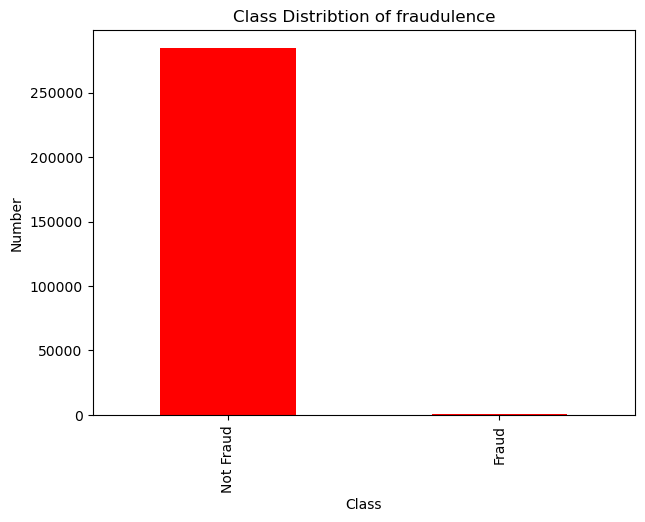

In [71]:
plt.figure(figsize = (7,5))

ax = class_dist.plot(kind = 'bar', color = 'red')

plt.xlabel('Class')

plt.ylabel('Number')

plt.xticks([0, 1], ['Not Fraud', 'Fraud'])

plt.title('Class Distribtion of fraudulence')

plt.show()

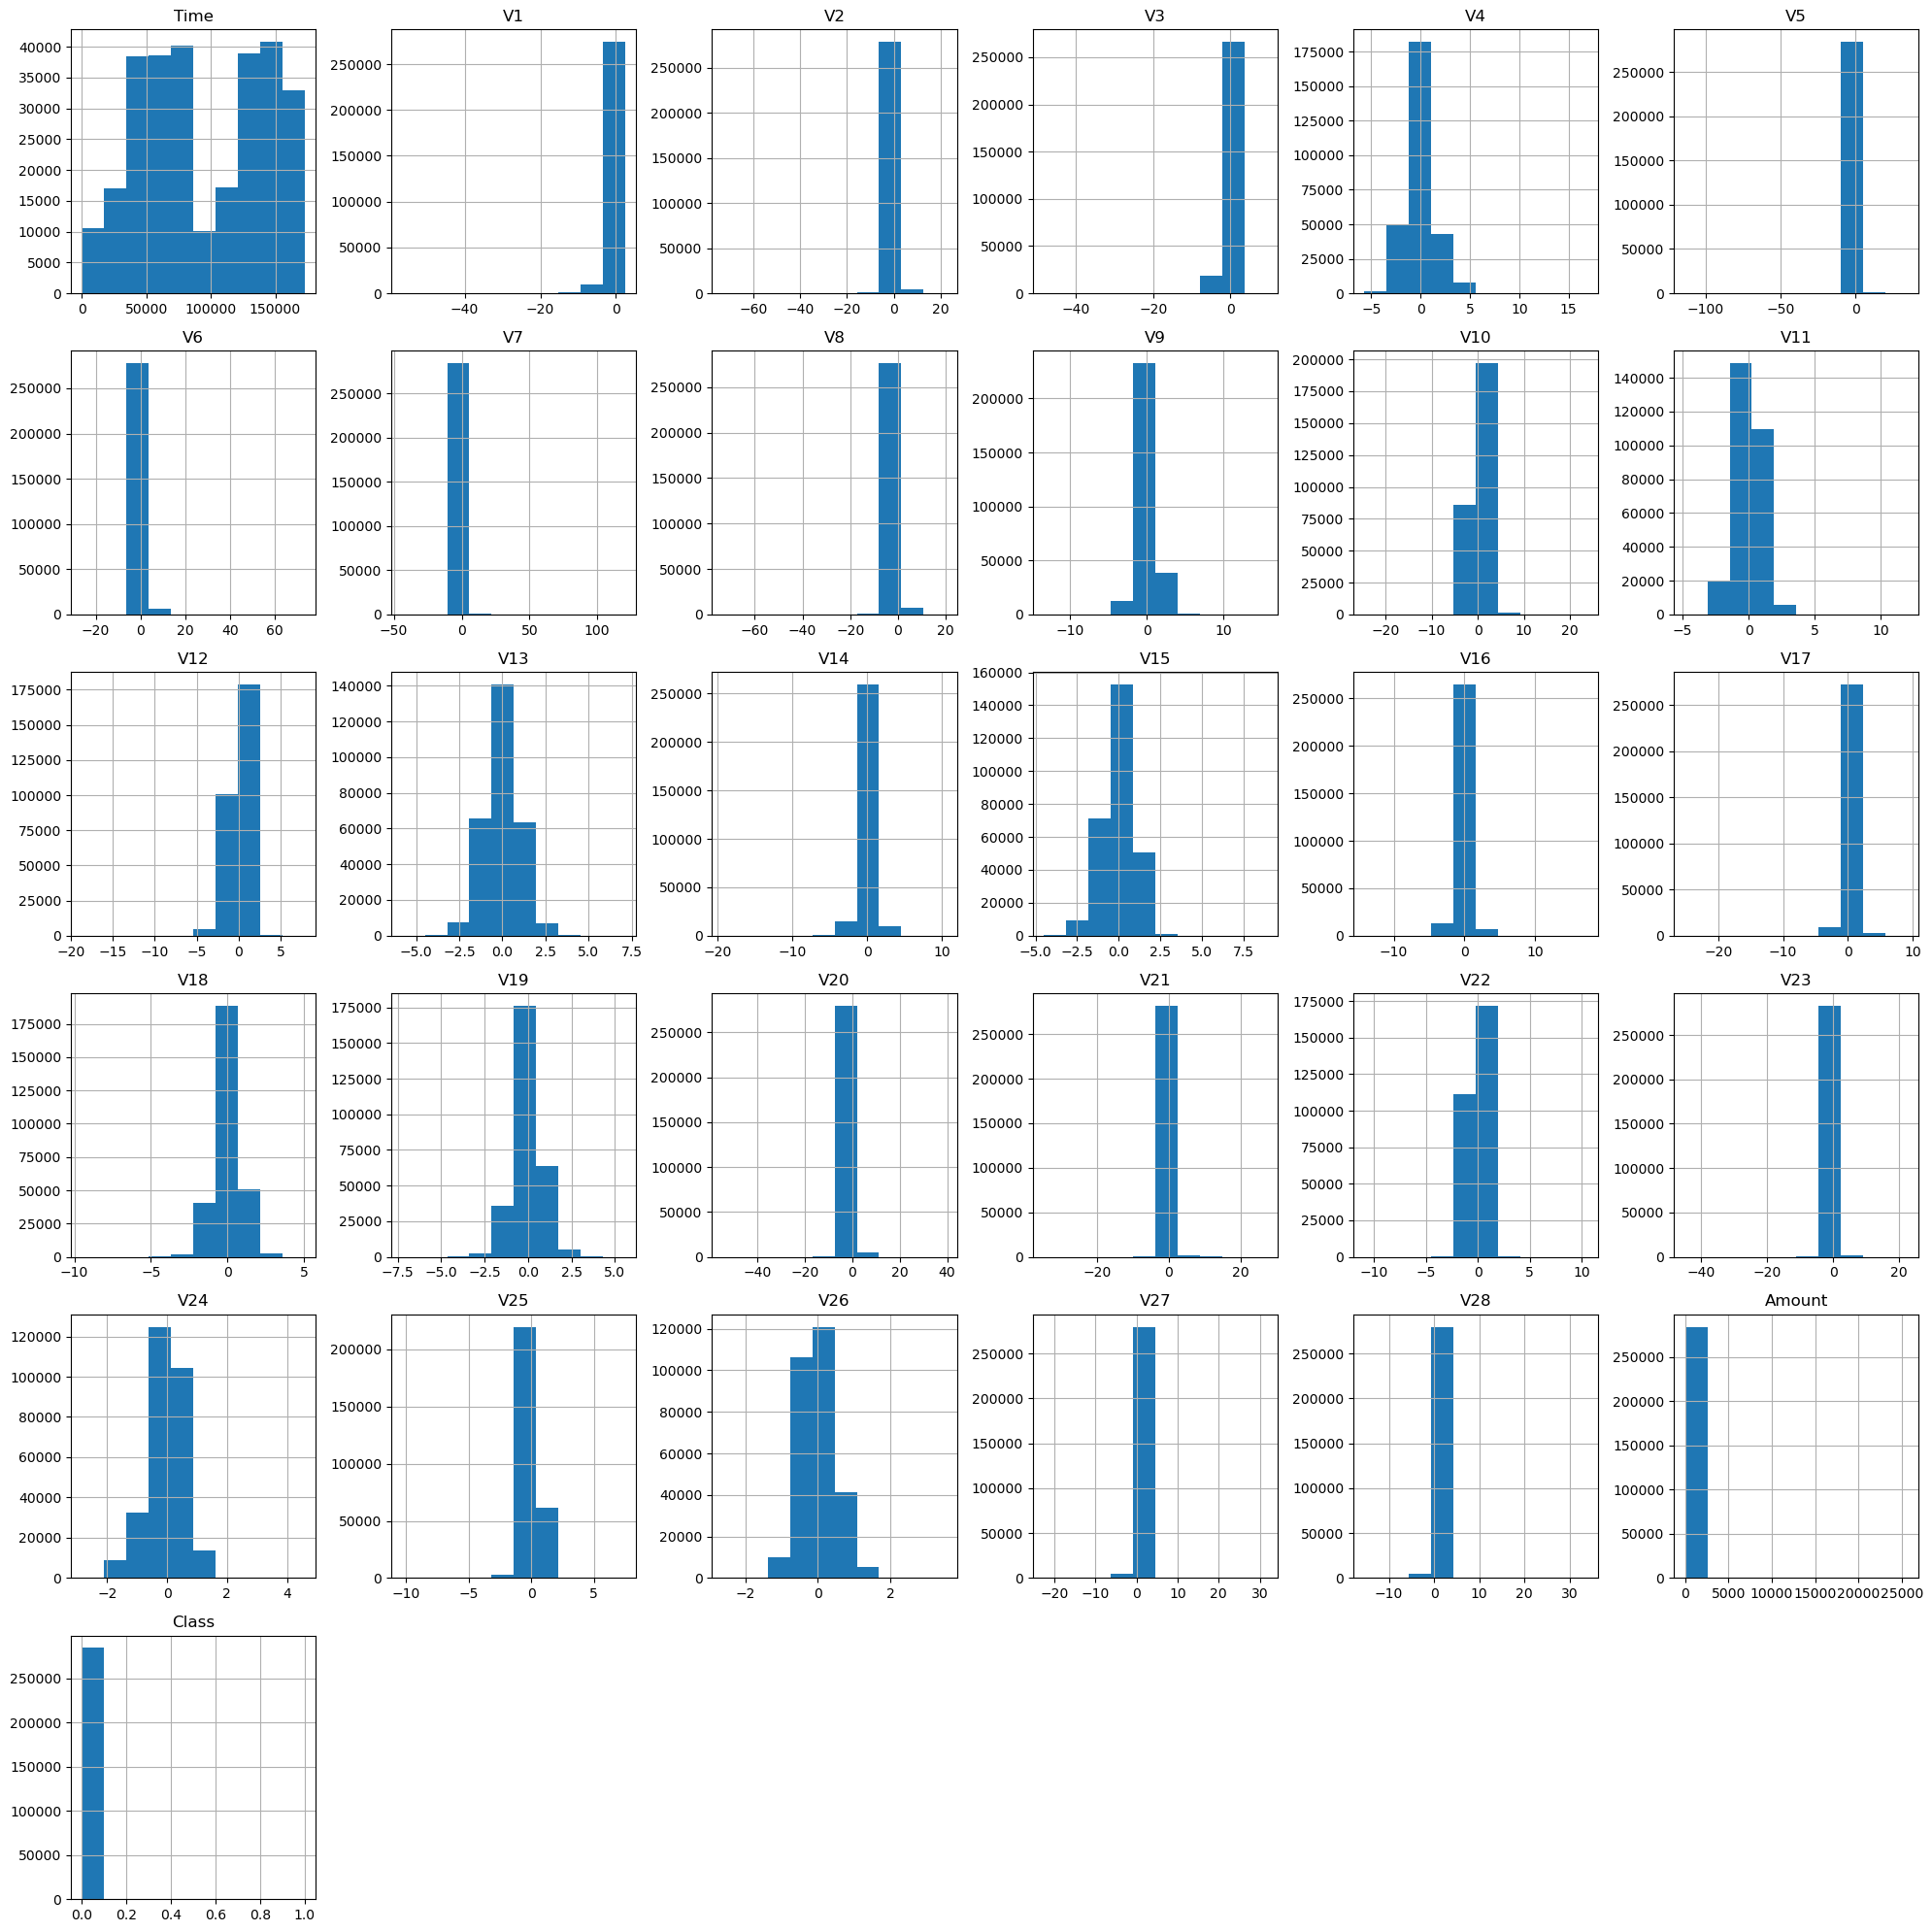

In [72]:
data.hist(figsize = (20, 20))
plt.tight_layout()
plt.show()

In [73]:
data = data.select_dtypes(include = [np.number])

X = data.drop('Class', axis = 1)
y = data['Class']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [75]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
models = [LogisticRegression(), SVC(), KNeighborsClassifier(), RandomForestClassifier()]

results = []

for model in models:
    model.fit(X_train, y_train)
    
    y_prediction = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_prediction)
    results.append(accuracy)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_prediction)}")
    print(f"Classification Report:\n{classification_report(y_test, y_prediction)}")
    print(f"Accuracy: {accuracy}")
    print("--------------------------------------")


Model: LogisticRegression
Confusion Matrix:
[[56855     9]
 [   41    57]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9991222218320986
--------------------------------------
Model: SVC
Confusion Matrix:
[[56862     2]
 [   37    61]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.62      0.76        98

    accuracy                           1.00     56962
   macro avg       0.98      0.81      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9993153330290369
--------------------------------------
Model: KNeighborsClassifier
C

## In the "About Dataset," section in the Kaggle notebook where this comes from, it says that a confusion matrix won't work for ubalanced data. It looks like no matter what, our accuracy was over 99.9%

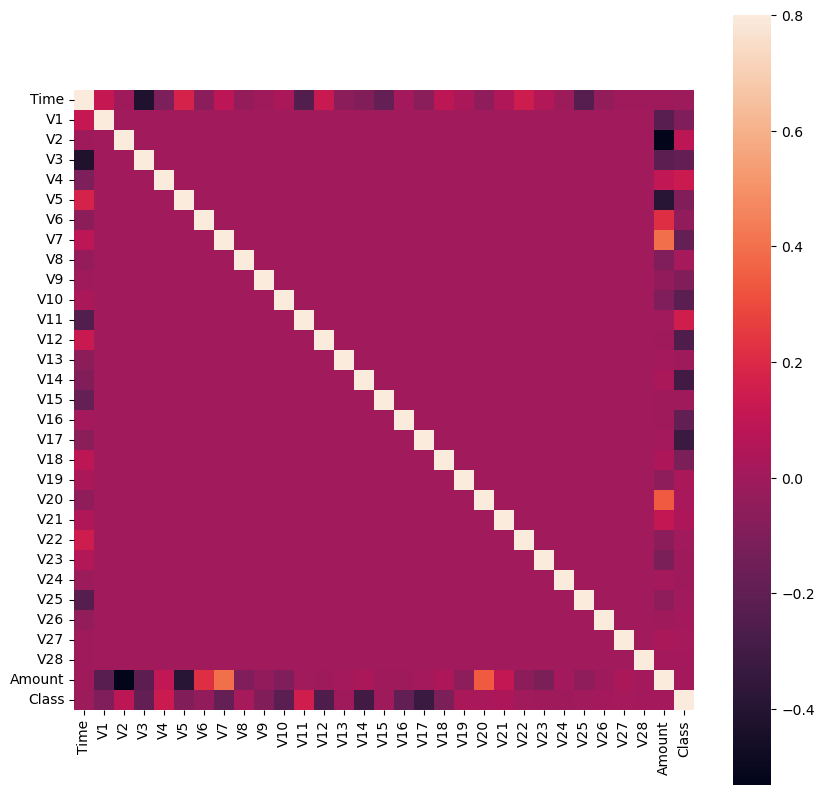

In [77]:
corr_matrix = data.corr()
fig = plt.figure(figsize = (10, 10))
sns.heatmap(corr_matrix, vmax =.8, square = True)
plt.show()

## The visual correlation map doesn't offer much for usefulness in correlation. This is an indicatior to move forward in a different way. 

## Let us now try and build a Random Forest Classifier and then provide a confusion matrix based on our data. 

In [78]:
random_fc = RandomForestClassifier()
random_fc.fit(X_train, y_train)

y_prediction = random_fc.predict(X_test)

In [79]:
print(f"Model: Random Forest Classifier")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_prediction)}")
print(f"Classification Report:\n{classification_report(y_test, y_prediction)}")
print(f"Accuracy: {accuracy}")
print("--------------------------------------")


Model: Random Forest Classifier
Confusion Matrix:
[[56861     3]
 [   21    77]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9995786664794073
--------------------------------------


## It looks like any of the classifiers will provide enough accuracy to be used in credit card fraud detection. 

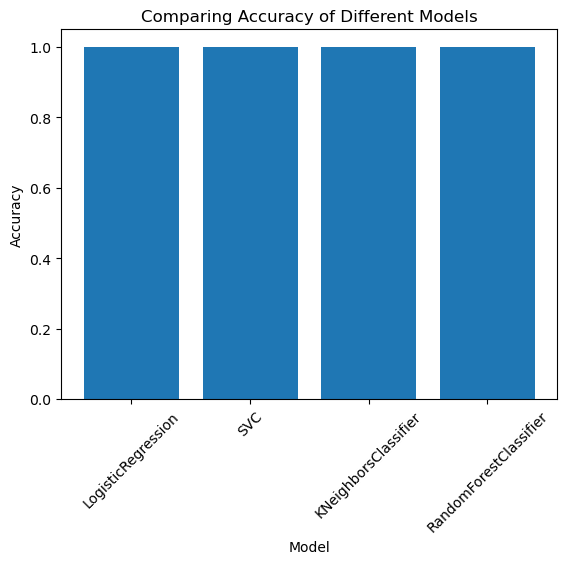

In [80]:
plt.bar([model.__class__.__name__ for model in models], results)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparing Accuracy of Different Models')
plt.xticks(rotation=45)
plt.show()

## Let us code and plot a confusion matrix of the data

In [81]:
#confusion matrix

confusion = confusion_matrix(y_test, y_prediction)
print(confusion)

[[56861     3]
 [   21    77]]


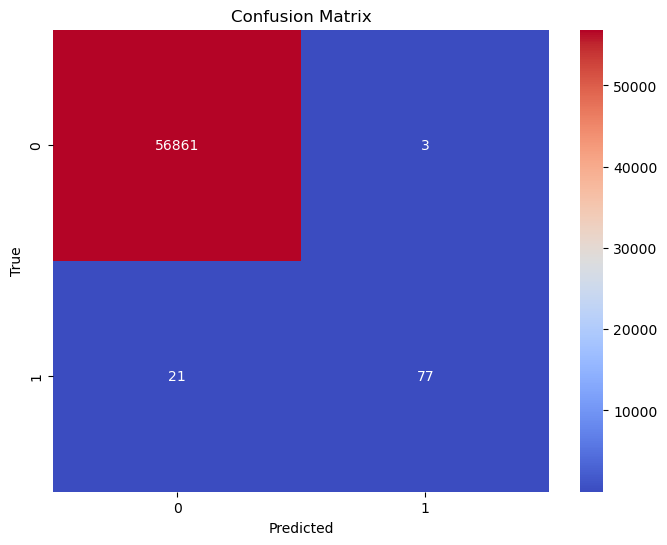

In [82]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion, annot = True, fmt = 'd', cmap = 'coolwarm')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

## In conclusion, we brought in a credit card dataset that compiled information from two days of use and detected fraudulent activity. We needed to understand the best way to apply the data and understanding the csv file when it had no easily discernible information. We took from the dataset post that it would be an umbalanced dataset and we would have to keep that considered during our analysis. We 

## We created a training set and used it to build machine learning classifiers that will detect fraudulent activity and can further fine tune the process. We could find certain features to select from that data and omit others to help trigger a detection more quickly or build a classifier for an added level of confirmation of detection. We evaluated the performance of each model and realized that they are perform at a high level of accuracy, precision, recall, and F1 score. 